### Notebook to play around with CycIF data

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

In [2]:
# Import data
# Laptop
#WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
x = pd.read_csv('segResultsUNet.csv', delimiter=',', index_col=0)
# Look at data
x.head()

,DNA_Hoechst 33342_0Nuclei_Mean,A488 background_none_1Nuclei_Mean,A555 background_none_2Nuclei_Mean,A647 background_none_3Nuclei_Mean,DNA 2_Hoechst 33342_4Nuclei_Mean,KI67_Alexa 488_5Nuclei_Mean,VIMENTIN_Alexa 555_6Nuclei_Mean,PDL1_Alexa 647_7Nuclei_Mean,DNA 3_Hoechst 33342_8Nuclei_Mean,CD4_Alexa 488_9Nuclei_Mean,...,CD45_Alexa 555_30Nuclei_Median,pERKz_Alexa 647_31Nuclei_Median,DNA 9_Hoechst 33342_32Nuclei_Median,S100_Alexa 488_33Nuclei_Median,VEGFR2_Alexa 555_34Nuclei_Median,SMA_Alexa 647_35Nuclei_Median,NucleusArea,CytoplasmArea,CellPosition_X,CellPosition_Y
cell,,,,,,,,,,,,,,,,,,,,,
c1,26667.48889,3513.666667,1021.377778,2682.266667,23914.17778,2136.688889,1426.488889,1345.488889,26071.68889,4228.688889,...,767,2182,10425,8088,5143,789,45,45,8.333333,4785.822222
c2,51567.00000,4629.000000,1797.583333,2680.500000,37611.66667,2545.833333,8919.166667,1162.750000,52529.58333,6998.583333,...,1289,2371,29040,18090,11740,1538,12,12,6.500000,4818.500000
c3,50158.69444,4971.777778,1845.861111,3230.361111,43009.08333,2791.361111,2154.000000,1401.750000,53318.50000,6805.444444,...,1232,2731,25375,10505,8901,1392,36,36,7.361111,4841.916667
c4,40791.57895,4798.500000,1596.315789,3129.815789,36657.94737,2782.842105,4262.000000,1467.763158,42948.39474,7165.578947,...,1184,2716,22386,13829,12365,2247,38,38,7.368421,4850.500000
c5,28021.14545,5559.763636,1700.309091,4971.945455,29582.16364,3024.454545,1298.727273,1659.054545,26210.07273,6683.127273,...,1180,3863,11760,9479,14742,1347,55,55,9.363636,4881.290909


In [12]:
# Remove all DAPI columns
#cols = [c for c in x.columns if c[:4] != 'DAPI']
#x1=x[cols]
# Add the first DAPI channel
#x1 = pd.concat([x1, x[['DAPI']]], axis=1)

In [13]:
# Convert to AnnData
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_anndata.py'
exec(open(wget.download(file_url)).read())
adata = mi_pp_anndata (x)
adata

100% [..................................................................................] 696 / 696Converting dataframe into anndata - Annotated Data...


AnnData object with n_obs × n_vars = 3018 × 16 
    obs: 'cells'

In [14]:
# Save data
adata.write('temp.h5ad')

In [5]:
 # Reload data
adata = sc.read('temp.h5ad')

In [14]:
sc.pp.log1p(adata)

TypeError: ufunc 'log1p' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''

In [8]:
adata.X.dtype

dtype('int32')

In [7]:
# Normalisation of data
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
x1 = mi_pp_normalize(x1)
x1.head()

100% [..................................................................................] 654 / 654Applying log transformation and quantile normalization...


,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,2.575301,2.008719,1.958202,1.973786,1.976253,1.967054,1.985527,1.988584,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,0.312099
C2,1.983059,1.981726,1.958202,1.973786,1.392263,1.967054,1.985527,1.545427,0.0,2.007415,1.994599,4.018036,1.391636,2.021628,0.0,0.790593
C3,1.724261,1.981726,1.958202,1.442310,1.976253,1.967054,1.985527,0.646965,0.0,1.984458,1.994599,1.938175,1.391636,1.954667,0.0,1.566451
C4,1.983059,1.981726,1.958202,1.973786,1.976253,1.967054,1.985527,0.000000,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,1.245770
C5,1.983059,1.981726,1.958202,1.973786,1.976253,1.967054,1.985527,1.988584,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,1.341858


In [8]:
# Convert to AnnData
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_anndata.py'
exec(open(wget.download(file_url)).read())
adata = mi_pp_anndata (x1)
adata

100% [..................................................................................] 693 / 693Converting dataframe into anndata - Annotated Data...


AnnData object with n_obs × n_vars = 3324 × 16 
    obs: 'cells'

### Scanpy analysis

In [9]:
adata

AnnData object with n_obs × n_vars = 3324 × 16 
    obs: 'cells'

In [10]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_genes(adata, min_cells=0)
adata.obs['n_counts'] = adata.X.sum(axis=1)

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 


In [15]:
sc.tl.pca(adata, svd_solver='arpack')

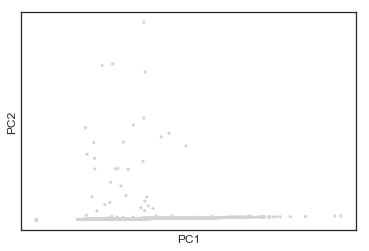

In [16]:
sc.pl.pca(adata)

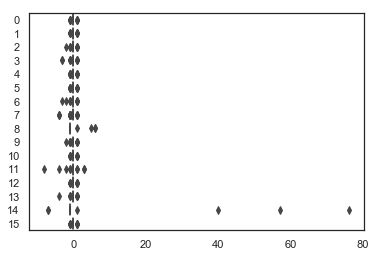

In [104]:
sns.boxplot(data= adata.X, orient="h")

In [17]:
# Preprocessing
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=0)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

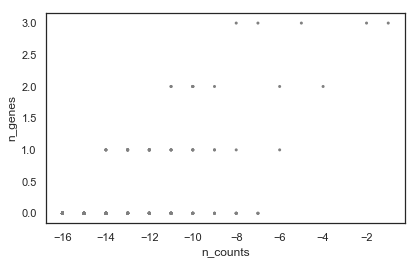

In [23]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [20]:
sc.tl.pca(adata, svd_solver='arpack')

TypeError: object of type 'numpy.int64' has no len()

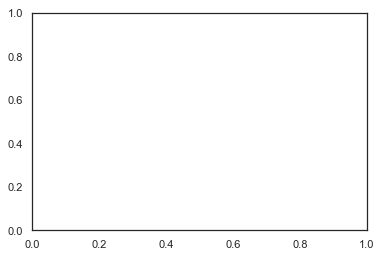

In [18]:
sc.pl.pca(adata, color = 'DAPI')

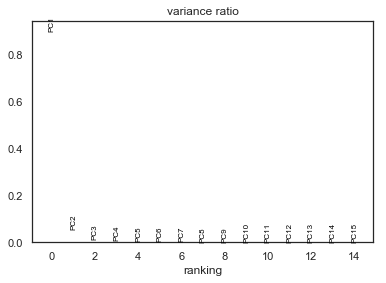

In [14]:
sc.pl.pca_variance_ratio(adata)

In [15]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=3)

In [16]:
sc.tl.umap(adata)

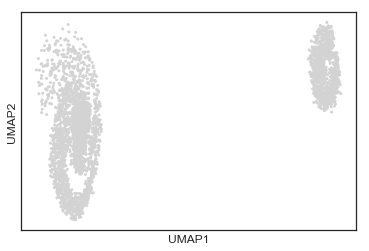

In [17]:
sc.pl.umap(adata)